<a href="https://colab.research.google.com/github/akprodromou/DWS101-Machine-Learning/blob/main/DWS_Assignment_2_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Εργασία 2 – Δέντρα Απόφασης & Τυχαία Δάση

Χημική εταιρεία θέλει να κατασκευάσει φορητή συσκευή ανάλυσης νερού, που μέσω χημικών αναλύσεων θα εξάγει διάφορα χαρακτηριστικά από το νερό και θα αποφασίζει αν το νερό είναι πόσιμο. Διαθέτετε στη διάθεση σας 3276 παραδείγματα πόσιμου και μη πόσιμου νερού.


## Ερώτημα 1

### Εισάγω τις βιβλιοθήκες που θα χρησιμοποιήσω

Let's start by loading the libraries we are going to use:

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# για τις δοκιμές του ερωτήματος 8
from sklearn.model_selection import GridSearchCV
from sklearn import tree
# για το ερώτημα 14
from sklearn.metrics import confusion_matrix

In [105]:
# παλέττα χρωμάτων
colors = ['#90b493','#9390b4','#b49390']

In [106]:
water_raw = pd.read_csv("/content/water_potability.csv")

In [107]:
water_raw.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Στη συνέχεια, να τα περιγράψετε (describe) και να δημιουργήσετε το ιστόγραμμα για κάθε χαρακτηριστικό, καθώς και ραβδόγραμμα για τη μεταβλητή Potability.

In [108]:
water_raw.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [109]:
water_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Έχω 9 features και ένα target (Potability). Τα χαρακτηριστικά έχουν τα σωστά data types (int και flow).

Με μια πρώτη ματιά παρατηρώ πως τα χαρακτηριστικά ph, Sulfate και Trihalomethanes έχουν αρκετές ελλείπουσες τιμές. Ας δω την κατανομή των χαρακτηριστικών χρησιμοποιώντας ιστογράμματα. Η Matplotlib δίνει την δυνατότητα plot πολλών διαγραμμάτων σε ένα χρησιμοποιώντας την εντολή [tight layout](https://matplotlib.org/stable/users/explain/axes/tight_layout_guide.html), οπότε θα δοκιμάσω αυτό:

In [110]:

X = water_raw.drop('Potability',axis=1)
y = water_raw['Potability']
# οι γραμμές του ομαδικού plot
nrows = math.ceil(X.shape[1]/2)

ncols = 2

print(f"I have {nrows} rows and {ncols} columns")


I have 5 rows and 2 columns


In [111]:
X.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

Επομένως το axes είναι ένα 2D array. Φτιάχω ένα for loop για τα γραφήματά μου, αφού το μετατρέψω πρώτα σε μίας διάστασης για να μπορέσω να κάνω interate ευκολότερα:

Το axes είναι <class 'numpy.ndarray'> διαστάσεων (5, 2).
Το axes είναι <class 'numpy.ndarray'> διαστάσεων (10,).
Το for loop θα τρέξει τώρα σε σειρά (10,) στοιχείων.


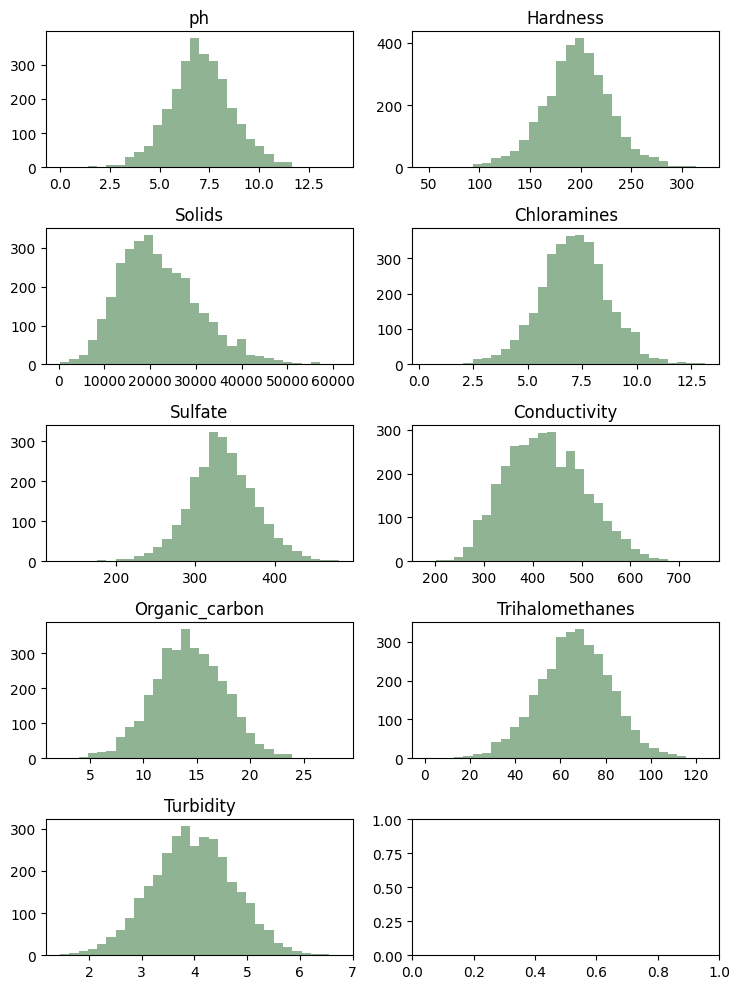

In [112]:
# returns a tuple containing a figure and axes objects
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(nrows *1.5, ncols * 5))
print(f"Το axes είναι {type(axes)} διαστάσεων {axes.shape}.")

# επομένως θα το μετατρέψω σε σειρά μιας διάστασης για το for loop μου
axes = axes.reshape(-1)
print(f"Το axes είναι {type(axes)} διαστάσεων {axes.shape}.")
print(f"Το for loop θα τρέξει τώρα σε σειρά {axes.shape} στοιχείων.")

# iterate over the column names
for i, column in enumerate(X.columns):
  axes[i].hist(X[column], bins=30, color=colors[0])
  axes[i].set_title(column)

# για να τα γκρουπάρω
plt.tight_layout()

# render the figure
plt.show()

#### Σχόλια
- Οι κατανομές pH, Hardness, Chloramines, Sulfate, Trihalomethanes και Turbidity μοιάζουν κανονικές.
- Solid, Conductivity: έχουν θετική λοξότητα

### Ραβδόγραμμα για τη μεταβλητή Potability

Θα ξεκινήσω υπολογίζοντας τον αριθμό των τιμών που παίρνει η κατηγορική μου μεταβλητή:

In [113]:
print(y.value_counts())

Potability
0    1998
1    1278
Name: count, dtype: int64


όπου index είναι το [0,1] και τιμές οι [1998, 1278]

Text(0.5, 0, 'Values')

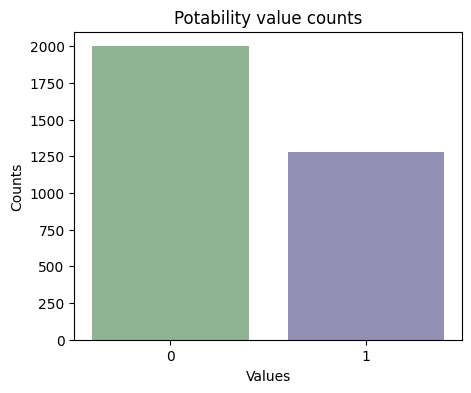

In [114]:
# create a new figure, with the specific size
plt.figure(figsize=(5,4))

plt.bar(
    # τις μετατρέπω σε strings για να φαίνονται σωστά στον άξονα x
    x = y.value_counts().index.astype(str),
    height = y.value_counts().values,
    color=[colors[0], colors[1]]
    )

plt.title("Potability value counts")
plt.ylabel("Counts")
plt.xlabel("Values")

### Να αναφέρετε το πλήθος των ελλειπουσών τιμών για κάθε χαρακτηριστικό

In [115]:
# χρησιμοποιώ το isna() των pandas
print(f"Ελλείπουσες τιμές ανά χαρακτηριστικό:\n{X.isna().sum()}")
print(f"Ελλείπουσες τιμές στο Potability:\n{y.isna().sum()}")


Ελλείπουσες τιμές ανά χαρακτηριστικό:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
dtype: int64
Ελλείπουσες τιμές στο Potability:
0


### Ποσοστά πόσιμου και μη-πόσιμου νερού των παραδειγμάτων

Από το data card των δεδομένων μου έχουμε *Potable: Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable*.

In [116]:
potable = y.value_counts()[1]/y.value_counts().sum()
not_potable = y.value_counts()[0]/y.value_counts().sum()

print(f"We have {potable*100:.2f}% data entries and {not_potable*100:.2f}% non-potable data entries")

We have 39.01% data entries and 60.99% non-potable data entries


### Θεωρείτε η ποιότητα των δεδομένων είναι ικανοποιητική;

**Ελλειπούσες τιμές ph**

Από την [διαθέσιμη βιβλιογραφία](https://pmc.ncbi.nlm.nih.gov/articles/PMC8789185/):
- pH is probably by far the most important physicochemical parameter controlling the behavior of other water quality parameters as well as metals concentration in the aquatic environments. Chemical processes in aquatic systems such as acid-base reactions, solubility reactions, oxidation-reduction reactions and complexations are all influenced by hydrogen ions concentration.
- pH may also influence the lives of bacteria and the availability of other contaminants in water. At very high pH, metals tend to precipitate while chemicals such as ammonia become toxic to aquatic life. At low pH, solubility of metals tend to be high, chemicals like cyanide and sulphide become more toxic.
Επομένως η έλλειψη τιμών pH σε ποσοστό (491/3276)~15% είναι σημαντική.

**Ελλειπούσες τιμές Sulfate (θειϊκές ενώσεις)**

Από την [διαθέσιμη βιβλιογραφία του Παγκόσμιου Οργανισμού Υγείας](https://iris.who.int/server/api/core/bitstreams/69c17edd-ee26-425b-9d34-33799377e886/content): *SThe presence of sulfate in drinking-water can cause noticeable taste, and very high
levels might cause a laxative effect in unaccustomed consumers. Taste impairment
varies with the nature of the associated cation; taste thresholds have been found to
range from 250 mg/l for sodium sulfate to 1000 mg/l for calcium sulfate. It is generally considered that taste impairment is minimal at levels below 250 mg/l. No health-based
guideline value has been derived for sulfate.*

Επομένως το σχετικά υψηλό ποσοστό ελλειπουσών τιμών (781/3276~23.8%) δεν είναι καθοριστικό για την ποιότητα των δεδομένων μας.

**Κατανομή πόσιμων και μη πόσιμων μετρήσεων**
- Η κατανομή πόσιμων και μη πόσιμων μετρήσεων είναι αρκετά ισορροπημένη, οπότε κρίνεται ικανοποιητική.

Δεδομένης και της κατανομής των επιμέρους χαρακτηριστικών που είδαμε νωρίτερα, η ποιότητα των δεδομένων κρίνεται γενικά ως καλή.

## Ερώτημα 2

Σύμφωνα με τον Παγκόσμιο Οργανισμό Υγείας (ΠΟΥ), τα προτεινόμενα επίπεδα pH του νερού είναι 6.5 και 8.5. Υπολογίστε τα ποσοστά πόσιμου και μη-πόσιμου νερού των παραδειγμάτων για α) pH<6.5, β) 6.5≤pH≤8.5 και η) 8.5<pH. Σε τι βαθμό επαληθεύεται η ιδιότητα αυτή στα δεδομένα σας;

Για να απαντήσουμε στο ερώτημα, θα χωρίσουμε τα δεδομένα μας σε υπο-ομάδες (bins). Θα δημιουργήσω μια νέα στήλη, όπου θα σημειώνεται για κάθε γραμμή δεδομένων σε ποιά από τις 3 ομάδες της εκφώνησης ανήκει:

In [117]:
# Θα εξετάσω τις ηλικίες μέσω του iterrows (iterates over DataFrame rows as (index, Series) pairs)
for index, row in water_raw.iterrows():
    if row['ph']< 6.5:
        water_raw.loc[index, 'ph_group'] = '0-6.5'
    elif 6.5 <= row['ph'] < 8.5:
        water_raw.loc[index, 'ph_group'] = '6.5-8.5'
    else:
        water_raw.loc[index, 'ph_group'] = '>8.5'

water_raw.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,ph_group
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,>8.5
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0,0-6.5
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0,6.5-8.5
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,6.5-8.5
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,>8.5


In [118]:
# αποθηκεύω τις τιμές της στήλης για να κάνω iterate αμέσως μετά
ph_group_values = sorted(water_raw['ph_group'].unique())
print(ph_group_values)

['0-6.5', '6.5-8.5', '>8.5']


In [119]:
# water_raw['ph'][water_raw['ph_group']=='0-6.5'].count()
# water_raw['Potability'][water_raw['ph_group']=='0-6.5'].count()

# Γνωρίζω από νωρίτερα πως δεν έχω na values στο Potability
total_value_count = water_raw.Potability.count()

for value in ph_group_values:
  potable_ph_count = sum((water_raw.ph_group == value) & (water_raw.Potability == 1))
  potable_ph_ratio = potable_ph_count / total_value_count * 100
  print(f"The potable ratio for {value} pH values is {potable_ph_ratio:.1f}%")

The potable ratio for 0-6.5 pH values is 10.9%
The potable ratio for 6.5-8.5 pH values is 17.8%
The potable ratio for >8.5 pH values is 10.3%


Τα ποσοστά πόσιμου νερού πράγματι είναι υψηλότερα όταν το pH είναι μεταξύ 6.5-8.5, η διαφορά όμως του 7-8% σημαίνει πως το pH από μόνο του δεν αρκεί για να επαληθεύσουμε την ποιότητα του νερού. Ως χαρακτηριστικό, δεν εξηγεί από μόνο του το αποτέλεσμα εξόδου (output).

## Ερώτημα 3
*Σύμφωνα με τον ΠΟΥ, τα προτεινόμενα επίπεδα χλωραμίνης είναι ως 4 ppm. Δημιουργήστε διάγραμμα διασποράς (scatter plot) μεταξύ x: pH και y: Chloramine, στο οποίο θα χρωματίσετε τα πόσιμα παραδείγματα με μπλε και τα μη-πόσιμα με κόκκινο. Τι διαπιστώνετε για τη διαχωρισιμότητα των παραδειγμάτων;*

Θα χρησιμοποιήσω το subplot που χρησιμοποίησα και στο ερώτημα 1, γιατί μου δίνει ευκολότερο έλεγχο στην εμφάνιση του γραφήματός μου:

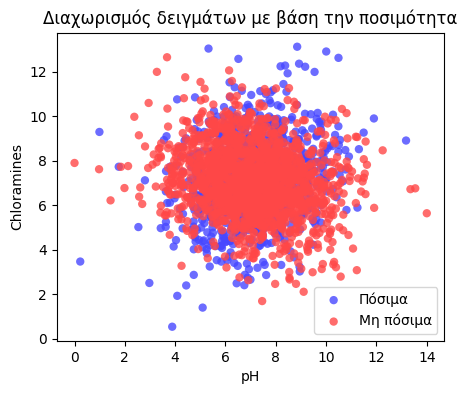

In [120]:
# διαχωρίζω potable και non-potable
# 1 means Potable and 0 means Not Potable
potable_df = water_raw[water_raw['Potability']==1]
non_potable_df = water_raw[water_raw['Potability']==0]

# Create a figure and a set of subplots (σαν initiate)
fig, ax = plt.subplots(figsize=(5,4))

# πρώτα πλοτάρω τα πόσιμα
ax.scatter(
    x = potable_df['ph'],
    y = potable_df['Chloramines'],
    color ="#4747ff",
    alpha=0.8,
    edgecolors='none',
    label='Πόσιμα'
    )

# και ακολούθως πλοτάρω τα μη-πόσιμα
ax.scatter(
    x = non_potable_df['ph'],
    y = non_potable_df['Chloramines'],
    color ="#ff4747",
    alpha=0.8,
    edgecolors='none',
    label='Μη πόσιμα'
    )

ax.legend()
ax.grid(False)
ax.set_xlabel('pH')
ax.set_ylabel('Chloramines')
plt.title("Διαχωρισμός δειγμάτων με βάση την ποσιμότητα")

plt.show()

Διαπιστώνουμε πως τα δείγματα δεν είναι εύκολα διαχωρίσιμα, δηλαδή δεν ανήκουν σε clusters (ομάδες).

## Ερώτημα 4

*Συμπληρώστε τις ελλειπής τιμές (αν υπάρχουν). Μπορείτε να χρησιμοποιήσετε τη συνάρτηση fillna() του pandas. Για απλότητα, μπορείτε να χρησιμοποιήσετε κάποια σταθερά (πχ df[‘x’] = df[‘x’].fillna(c) όπου c 0 ή -1 αν δεν υπάρχουν άλλες τέτοιες τιμές στη στήλη). Εναλλακτικά μπορείτε να συμπληρώσετε με τη μέση τιμή (πχ df[‘x’] = df[‘x’].fillna(df[‘x’].mean()). Το βήμα αυτό είναι απαραίτητο καθώς δε γίνεται να προχωρήσετε στην εκπαίδευση του δέντρου (η scikit-learn δε χειρίζεται αυτόματα τις ελλειπής τιμές στα δέντρα).*

Θα ξεκινήσω από το pH, και θα συμπληρώσω τις ελλείπουσες χρησιμοποιώντας την διάμεσο (median), που προτείνεται από τη βιβλιογραφία ως μέτρο κεντρικής τάσης ανθεκτικό στις έκτοπες τιμές:

In [121]:
# Δημιουργώ το «καθαρο df» για να δουλεύω εφεξής
water_df_clean = water_raw.drop(labels="ph_group", axis=1)

# ph (491 τιμές)
print(round(water_df_clean['ph'].median(),2))
# το fillna συμπληρώνει τις NA/NaN values με την τιμή που καθορίζω
water_df_clean['ph'] = water_df_clean['ph'].fillna(value = water_df_clean['ph'].median())

7.04


In [122]:
# Sulfate (781 τιμές)
print(round(water_df_clean['Sulfate'].median(),2))
# το fillna συμπληρώνει τις NA/NaN values με την τιμή που καθορίζω
water_df_clean['Sulfate'] = water_df_clean['Sulfate'].fillna(value = water_df_clean['Sulfate'].median())

333.07


In [123]:
# Trihalomethanes (162 τιμές)
print(round(water_df_clean['Trihalomethanes'].median(),2))
# το fillna συμπληρώνει τις NA/NaN values με την τιμή που καθορίζω
water_df_clean['Trihalomethanes'] = water_df_clean['Trihalomethanes'].fillna(value = water_df_clean['Trihalomethanes'].median())

66.62


Κάνω έναν έλεγχο πως πέτυχε το fillna():

In [124]:
water_df_clean.isna().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


## Ερώτημα 5

*Δημιουργήστε numpy arrays με κατάλληλα inputs (x) και targets (y), όπου target το potability.*

In [125]:
# Όμοια με τον διαχωρισμό που έκανα στο explanatory phase
# Επιλέγω το κεφαλαίο γράμμα X για να δηλώσω πίνακα δεδομένων (matrix)
# Κρατώ το y πεζό για να δηλώσω σειρά (διάνυσμα)
X = water_df_clean.drop('Potability',axis=1)
y = water_df_clean['Potability']

In [126]:
X
print(type(X))
X = X.to_numpy()
print(type(X))

# Γιατί το μετατρέπουμε σε array από τη στιγμή που στον ορισμό της συνάρτησης διαβάζω
# «Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes.»;

X.shape, y.shape

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


((3276, 9), (3276,))

*Χωρίστε τα δεδομένα σε train-test σε ποσοστό 70-30 αντίστοιχα με 0 seed.*

In [127]:
seed = 0
test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

print(f"Train dataset size is {X_train.shape[0]} values")
print(f"Test dataset size is {X_test.shape[0]} values")

Train dataset size is 2293 values
Test dataset size is 983 values


## Ερώτημα 6
*Εκπαιδεύστε ταξινομητή Δέντρο Απόφασης (Decision Tree) στο train set και ύστερα μετρήστε την ακρίβεια του (accuracy) στα train, test σετ.*

In [128]:
# define the model
clf = DecisionTreeClassifier(random_state=0, criterion = "gini")
# Το Gini είναι η το default κριτήριο διαχωρισμού

In [129]:
# train it on the train data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [130]:
# and get the predictions, first for the training set
y_pred_train = clf.predict(X_train)

accuracy = accuracy_score(y_train, y_pred_train)
accuracy_percentage_train_gini = round(accuracy*100, 2)

print(f'The accuracy of the model on the training data using the gini criterion is: {accuracy_percentage_train_gini}')

# and for the test set
y_pred_test = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test)
accuracy_percentage_test_gini = round(accuracy*100, 2)

print(f'The accuracy of the model on the test data using the gini criterion is: {accuracy_percentage_test_gini}')

The accuracy of the model on the training data using the gini criterion is: 100.0
The accuracy of the model on the test data using the gini criterion is: 57.68


## Ερώτημα 7
Επαναλάβετε το ερώτημα 5, δοκιμάζοντας τους παρακάτω συνδυασμούς:
- criterion (gini, entropy)

Καταρχήν θα δημιουργήσω ένα κενό dataframe, για να αποθηκεύω τα αποτελέσματα που παίρνω από τις επιμέρους δοκιμές:

In [131]:
precision_table = pd.DataFrame(columns = ["Παράμετρος Δοκιμής", "Τιμή", "Ακρίβεια Training", "Ακρίβεια Testing"])
precision_table.loc[0] = ['Criterion', 'Gini', accuracy_percentage_train_gini, accuracy_percentage_test_gini]
precision_table.head()

,Παράμετρος Δοκιμής,Τιμή,Ακρίβεια Training,Ακρίβεια Testing
0,Criterion,Gini,100.0,57.68


In [132]:
# criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
clf = DecisionTreeClassifier(random_state=0, criterion = "entropy")

# train it on the train data
clf.fit(X_train, y_train)

# and get the predictions, first for the training set
y_pred_train = clf.predict(X_train)

accuracy = accuracy_score(y_train, y_pred_train)
accuracy_percentage_train_entropy = round(accuracy*100, 2)

print(f'The accuracy of the model on the training data using the entropy criterion is: {accuracy_percentage_train_entropy}')

# and for the test set
y_pred_test = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test)
accuracy_percentage_test_entropy = round(accuracy*100, 2)

print(f'The accuracy of the model on the test data using the entropy criterion is: {accuracy_percentage_test_entropy}')

precision_table.loc[1] = ['Criterion', 'Entropy', accuracy_percentage_train_entropy, accuracy_percentage_test_entropy]
precision_table.head()

The accuracy of the model on the training data using the entropy criterion is: 100.0
The accuracy of the model on the test data using the entropy criterion is: 59.1


,Παράμετρος Δοκιμής,Τιμή,Ακρίβεια Training,Ακρίβεια Testing
0,Criterion,Gini,100.0,57.68
1,Criterion,Entropy,100.0,59.10


#### Σχόλιο
Από τη βιβλιογραφία γνωρίζω πως ο δείκτης **Gini** ($G$) μετρά την ομοιογένεια ενός κόμβου, ή τη συνολική διασπορά ανάμεσα σε $K$ κλάσεις σε έναν κόμβο χρησιμοποιώντας τον τύπο:

$$\text{Gini}(S) = 1 - \sum_{i} p_{i}^2$$
όπου:
* $p_{i}$ το ποσοστό των παραδειγμάτων του S που ανήκουν στην κατηγορία i.
* $\sum_{i}$ είναι το άθροισμα όλων των κατηγοριών.

Οπότε α) εάν δύο κατηγορίες έχουν από παρόμοιο ποσοστό παραδειγμάτων στο σύνολο του κόμβου (π.χ. 55%-45%), υψώνοντας στο τετράγωνο απομακρυνόμαστε από το 0 (1-0.55^2-0.45^2 = 0.495), ενώ β) εάν μια κατηγορία έχει υψηλό ποσοστό παραδειγμάτων, ο δείκτης πλησιάζει το 0 (ακόμα και υψώνοντας το ποσοστό του στο τετράγωνο), και αποτελεί δείκτη ομοιογένειας του S (π.χ. 1-0.95^2-0.05^2 = 0.095).

- max_depth (None, 3, 5)

Την τιμή για βάθος δένδρου χωρίς όριο (None) την έχω ήδη από τον ταξινομητή με κριτήριο «Gini», μιας και είναι η default τιμή στη scikit learn. Για λόγους ευκολίας καταγραφής και καθαρότητας κώδικα όμως, θα την υπολογίσω εκ νέου παρακάτω:

In [133]:
max_depth = [None, 3, 5]

for i, depth in enumerate(max_depth, start=1):

  clf = DecisionTreeClassifier(random_state=0, criterion = "gini", max_depth=depth)
  # train it on the train data
  clf.fit(X_train, y_train)
  # and get the predictions, first for the training set
  y_pred_train = clf.predict(X_train)

  accuracy = accuracy_score(y_train, y_pred_train)
  accuracy_percentage_train_max_depth = round(accuracy*100, 2)

  print(f'The accuracy of the model on the training data using max_depth = {depth} is: {accuracy_percentage_train_max_depth}')

  # and for the test set
  y_pred_test = clf.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred_test)
  accuracy_percentage_test_max_depth = round(accuracy*100, 2)

  print(f'The accuracy of the model on the test data using max_depth = {depth} is: {accuracy_percentage_test_max_depth}')

  # προσθέτω το αποτέλεσμα στο df μου
  precision_table.loc[1 + i] = ['Max Depth', depth, accuracy_percentage_train_max_depth, accuracy_percentage_test_max_depth]

precision_table.head()


The accuracy of the model on the training data using max_depth = None is: 100.0
The accuracy of the model on the test data using max_depth = None is: 57.68
The accuracy of the model on the training data using max_depth = 3 is: 63.41
The accuracy of the model on the test data using max_depth = 3 is: 63.28
The accuracy of the model on the training data using max_depth = 5 is: 66.29
The accuracy of the model on the test data using max_depth = 5 is: 64.19


,Παράμετρος Δοκιμής,Τιμή,Ακρίβεια Training,Ακρίβεια Testing
0,Criterion,Gini,100.00,57.68
1,Criterion,Entropy,100.00,59.10
2,Max Depth,None,100.00,57.68
3,Max Depth,3,63.41,63.28
4,Max Depth,5,66.29,64.19


- min-samples-split (2, 5)

Η default τιμή του DecisionTreeClassifier στην sci-kit learn είναι min_samples_split = 2. Όμοια με παραπάνω, το υπολογίζω εκ νέου για λόγους καθαρότητας του κώδικα. Το τρέχω επίσης με for loop για ευκολία:

In [134]:
min_samples_split= [2, 5]

for i, split in enumerate(min_samples_split, start=1):

  clf = DecisionTreeClassifier(random_state=0, criterion = "gini", min_samples_split=split)
  # train it on the train data
  clf.fit(X_train, y_train)
  # and get the predictions, first for the training set
  y_pred_train = clf.predict(X_train)

  accuracy = accuracy_score(y_train, y_pred_train)
  accuracy_percentage_train_min_samples_split = round(accuracy*100, 2)

  print(f'The accuracy of the model on the training data using min_samples_split = {split} is: {accuracy_percentage_train_min_samples_split}')

  # and for the test set
  y_pred_test = clf.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred_test)
  accuracy_percentage_test_min_samples_split = round(accuracy*100, 2)

  print(f'The accuracy of the model on the test data using min_samples_split = {split} is: {accuracy_percentage_test_min_samples_split}')

  # προσθέτω το αποτέλεσμα στο df μου
  precision_table.loc[4 + i] = ['Min Samples Split', split, accuracy_percentage_train_min_samples_split, accuracy_percentage_test_min_samples_split]

precision_table


The accuracy of the model on the training data using min_samples_split = 2 is: 100.0
The accuracy of the model on the test data using min_samples_split = 2 is: 57.68
The accuracy of the model on the training data using min_samples_split = 5 is: 96.95
The accuracy of the model on the test data using min_samples_split = 5 is: 56.56


,Παράμετρος Δοκιμής,Τιμή,Ακρίβεια Training,Ακρίβεια Testing
0,Criterion,Gini,100.00,57.68
1,Criterion,Entropy,100.00,59.10
2,Max Depth,None,100.00,57.68
3,Max Depth,3,63.41,63.28
4,Max Depth,5,66.29,64.19
5,Min Samples Split,2,100.00,57.68
6,Min Samples Split,5,96.95,56.56


- min-samples-leaf (1, 2)

Όμοια με νωρίτερα:

In [135]:
min_samples_leaf= [1, 2]

for i, leaf in enumerate(min_samples_leaf, start=1):

  clf = DecisionTreeClassifier(random_state=0, criterion = "gini", min_samples_leaf=leaf)
  # train it on the train data
  clf.fit(X_train, y_train)
  # and get the predictions, first for the training set
  y_pred_train = clf.predict(X_train)

  accuracy = accuracy_score(y_train, y_pred_train)
  accuracy_percentage_train_min_samples_leaf = round(accuracy*100, 2)

  print(f'The accuracy of the model on the training data using min_samples_leaf = {leaf} is: {accuracy_percentage_train_min_samples_leaf}')

  # and for the test set
  y_pred_test = clf.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred_test)
  accuracy_percentage_test_min_samples_leaf = round(accuracy*100, 2)

  print(f'The accuracy of the model on the test data using min_samples_leaf = {leaf} is: {accuracy_percentage_test_min_samples_leaf}')

  # προσθέτω το αποτέλεσμα στο df μου
  precision_table.loc[6 + i] = ['Min Samples Leaf', leaf, accuracy_percentage_train_min_samples_leaf, accuracy_percentage_test_min_samples_leaf]

precision_table

The accuracy of the model on the training data using min_samples_leaf = 1 is: 100.0
The accuracy of the model on the test data using min_samples_leaf = 1 is: 57.68
The accuracy of the model on the training data using min_samples_leaf = 2 is: 95.16
The accuracy of the model on the test data using min_samples_leaf = 2 is: 58.19


,Παράμετρος Δοκιμής,Τιμή,Ακρίβεια Training,Ακρίβεια Testing
0,Criterion,Gini,100.00,57.68
1,Criterion,Entropy,100.00,59.10
2,Max Depth,None,100.00,57.68
3,Max Depth,3,63.41,63.28
4,Max Depth,5,66.29,64.19
5,Min Samples Split,2,100.00,57.68
6,Min Samples Split,5,96.95,56.56
7,Min Samples Leaf,1,100.00,57.68
8,Min Samples Leaf,2,95.16,58.19


- max-features (None, sqrt)

In [136]:
max_features = [None, 'sqrt']

for i, feature in enumerate(max_features, start=1):

  clf = DecisionTreeClassifier(random_state=0, criterion = "gini", max_features=feature)
  # train it on the train data
  clf.fit(X_train, y_train)
  # and get the predictions, first for the training set
  y_pred_train = clf.predict(X_train)

  accuracy = accuracy_score(y_train, y_pred_train)
  accuracy_percentage_train_max_features = round(accuracy*100, 2)

  print(f'The accuracy of the model on the training data using max_features = {feature} is: {accuracy_percentage_train_max_features}')

  # and for the test set
  y_pred_test = clf.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred_test)
  accuracy_percentage_test_max_features = round(accuracy*100, 2)

  print(f'The accuracy of the model on the test data using max_features = {feature} is: {accuracy_percentage_test_max_features}')

  # προσθέτω το αποτέλεσμα στο df μου
  precision_table.loc[8 + i] = ['Max Features', feature, accuracy_percentage_train_max_features, accuracy_percentage_test_max_features]

precision_table

The accuracy of the model on the training data using max_features = None is: 100.0
The accuracy of the model on the test data using max_features = None is: 57.68
The accuracy of the model on the training data using max_features = sqrt is: 100.0
The accuracy of the model on the test data using max_features = sqrt is: 62.46


,Παράμετρος Δοκιμής,Τιμή,Ακρίβεια Training,Ακρίβεια Testing
0,Criterion,Gini,100.00,57.68
1,Criterion,Entropy,100.00,59.10
2,Max Depth,None,100.00,57.68
3,Max Depth,3,63.41,63.28
4,Max Depth,5,66.29,64.19
5,Min Samples Split,2,100.00,57.68
6,Min Samples Split,5,96.95,56.56
7,Min Samples Leaf,1,100.00,57.68
8,Min Samples Leaf,2,95.16,58.19
9,Max Features,None,100.00,57.68


- cost-complexity-pruning (0, 0.01)

In [137]:
ccp_alphanon = [0, 0.01]

for i, cost in enumerate(ccp_alphanon, start=1):

  clf = DecisionTreeClassifier(random_state=0, criterion = "gini", ccp_alpha=cost)
  # train it on the train data
  clf.fit(X_train, y_train)
  # and get the predictions, first for the training set
  y_pred_train = clf.predict(X_train)

  accuracy = accuracy_score(y_train, y_pred_train)
  accuracy_percentage_train_ccp_alphanon = round(accuracy*100, 2)

  print(f'The accuracy of the model on the training data using ccp_alphanon = {cost} is: {accuracy_percentage_train_ccp_alphanon}')

  # and for the test set
  y_pred_test = clf.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred_test)
  accuracy_percentage_test_ccp_alphanon = round(accuracy*100, 2)

  print(f'The accuracy of the model on the test data using ccp_alphanon = {cost} is: {accuracy_percentage_test_ccp_alphanon}')

  # προσθέτω το αποτέλεσμα στο df μου
  precision_table.loc[10 + i] = ['Minimal Cost-Complexity Pruning', cost, accuracy_percentage_train_ccp_alphanon, accuracy_percentage_test_ccp_alphanon]

The accuracy of the model on the training data using ccp_alphanon = 0 is: 100.0
The accuracy of the model on the test data using ccp_alphanon = 0 is: 57.68
The accuracy of the model on the training data using ccp_alphanon = 0.01 is: 60.53
The accuracy of the model on the test data using ccp_alphanon = 0.01 is: 62.05


*Δημιουργήστε πινακάκι ακρίβειας σε train-test για κάθε συνδυασμό με pandas, όπου οι στήλες θα είναι οι τιμές κάθε χαρακτηριστικό, καθώς και train acc, test acc.*

In [138]:
precision_table

,Παράμετρος Δοκιμής,Τιμή,Ακρίβεια Training,Ακρίβεια Testing
0,Criterion,Gini,100.00,57.68
1,Criterion,Entropy,100.00,59.10
2,Max Depth,None,100.00,57.68
3,Max Depth,3,63.41,63.28
4,Max Depth,5,66.29,64.19
5,Min Samples Split,2,100.00,57.68
6,Min Samples Split,5,96.95,56.56
7,Min Samples Leaf,1,100.00,57.68
8,Min Samples Leaf,2,95.16,58.19
9,Max Features,None,100.00,57.68


#### Σχόλιο

**Criterion (Κριτήριο Διαίρεσης)**

- Gini: Οδηγεί σε overfitting (υπερπροσαρμογή). Το δέντρο έχει 100% ακρίβεια στα δεδομένα εκπαίδευσης (training) αλλά 57.68% στα δεδομένα δοκιμής (test).
- Entropy: Ελαφρώς καλύτερη ακρίβεια στο test (59.10%) σε σχέση με το Gini, αλλά η υπερπροσαρμογή παραμένει.

**Max Depth (Μέγιστο Βάθος Δέντρου)**

- None (Χωρις όριο): Οδηγεί σε υπερπροσαρμογή (100% ακρίβεια στο training).
- 3: Ο περιορισμός του βάθους βελτιώνει την απόδοση στα δεδομένα test (63.28%), προσφέροντας  καλύτερη απόδοση στο test.
- 5: Λίγο βαθύτερο δέντρο, με ελαφρώς καλύτερη ακρίβεια στο test (64.19%), και η καλυτερη που πετυχαίνουμε σε αυτό το πείραμα δοκιμών γενικά.

**Min Samples Split (Ελάχιστος αριθμός δειγμάτων για να γίνει διαίρεση)**

- 2: Σχετικά χαμηλή απόδοση στο test (57.68%), ένδειξη overfitting
- 5: Εφαρμόζοντας μεγαλύτερο όριο διαίρεσης μειώνεται ελαφρώς και η απόδοση στο test (56.56%).

**Min Samples Leaf (Ελάχιστος αριθμός δειγμάτων ανά φύλλο)**

- Η αύξηση του ελάχιστου αριθμού δειγμάτων ανά φύλλο (από 1 σε 2) οδηγεί σε μικρή βελτίωση στην ακρίβεια σε δεδομένα test.

**Max Features (Μέγιστος aριθμός features)**

- Ενδιαφέρον παρουσιάζει το ότι όταν χρησιμοποιούμε όλα τα χαρακτηριστικά )(επιλογή None), έχουμε μεγαλύτερο overfitting, ενώ επιλέγοντας την τετραγωνική ρίζα του συνόλου τους, αυξάνεται η ακρίβεια στο test.

**Cost-Complexity Pruning**

Έχω χαμηλότερη απόδοση στο σύνολο test (57.68%) όταν δεν εφαρμόζω κλάδεμα μείωσης σφάλματος (0.00), ενώ καλύτερη απόδοση (62.05%) με κλάδεμα. Στην πράξη, αυτό σημαίνει πως όταν επιλέγω να κάνω το δένδρο μικρότερο και πιο απλό στη δομή του (εφαρμόζοντας ένα «penalty» στη συνθετότητα), έχω καλύτερα αποτελέσματα.

## Ερώτημα 8

### Επιλέξτε  τον συνδυασμό με τη μεγαλύτερη ακρίβεια στο test όταν max-depth = 3. Στη συνέχεια, συνέχεια, εκπαιδεύστε πάλι το δέντρο αυτό και απεικονίστε τη δομή του https://scikit-learn.org/1.5/modules/generated/sklearn.tree.plot_tree.html.

Η σωστή προσέγγιση είναι να τρέξω μοντέλα τα οποία κάνουν συνδυασμούς των επιμέρους τιμών, και όχι να διαλέξω αυτές που είχαν καλύτερη επίδοση μεμονωμένα, γιατί κάνοντας συνδυασμούς αυτά τα αποτελέσματα μπορούν να αλλάξουν. Για του λόγου το αληθές, θα τρέξω πρώτα έναν ταξινομητή με τις καλύτερες σε απόδοση στο test τιμές:

In [139]:
# Δοκιμή επιλέγοντας τις καλύτερες τιμές που προέκυψαν μεμονωμένα
clf = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=3,
    min_samples_leaf=2,
    min_samples_split=2,
    max_features="sqrt",
    ccp_alpha=0.01,
    random_state=0
)

# train it on the train data
clf.fit(X_train, y_train)
# and get the predictions, first for the training set
y_pred_train = clf.predict(X_train)

accuracy = accuracy_score(y_train, y_pred_train)
accuracy_percentage_train_individual_optimal = round(accuracy*100, 2)

print(f'The accuracy of the model on the training data using individually optimal criteria is: {accuracy_percentage_train_individual_optimal}')

# and for the test set
y_pred_test = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test)
accuracy_percentage_test_individual_optimal = round(accuracy*100, 2)

print(f'The accuracy of the model on the test data using individually optimal criteria is: {accuracy_percentage_test_individual_optimal}')

# προσθέτω το αποτέλεσμα στο df μου
precision_table.loc[13] = ['Individually optimal criteria', 'All', accuracy_percentage_train_individual_optimal, accuracy_percentage_test_individual_optimal]

The accuracy of the model on the training data using individually optimal criteria is: 62.01
The accuracy of the model on the test data using individually optimal criteria is: 62.67


Ενώ ως σωστή μέθοδο θα χρησιμοποιήσω την συνάρτηση GridSearchCV της scikit learn, που πραγματοποιεί μια «εξαντλητική αναζήτηση συγκεκριμένων τιμών παραμέτρων για έναν εκτιμητή», με σταθερό εκτιμητή το max-depth=3.

In [140]:
# Η βάση που ορίζω (estimator)
estimator = DecisionTreeClassifier(max_depth=3)

# Οι παράμετροι που θα δοκιμάσω
parameter_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt'],
    'ccp_alpha': [0, 0.01]
}

# Grid search
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameter_grid,
    # None uses the default 5-fold cross validation
    cv=None,
    # επειδή η εκφώνηση ζητά τον συνδυασμό με τη μεγαλύτερη ακρίβεια
    scoring='accuracy',
    # για να περιορίσω τα μηνύματα που εμφανίζονται
    verbose=1
)

# fit the model
grid_search.fit(X_train, y_train)

# Results
print("Τα καλύτερα χαρακτηριστικά είναι:", grid_search.best_params_)
best_score = round(grid_search.best_score_*100,2)
print(f'The accuracy of the model on the training data using the best model resulting from Grid Search is: {best_score}')

# Παίρνω το καλύτερο μοντέλο μου
best_model = grid_search.best_estimator_
# και υπολογίζω την ακρίβεια και στο test
best_model_test_accuracy = best_model.score(X_test, y_test)*100

print(f'The accuracy of the model on the test data using the best model resulting from Grid Search is: {best_model_test_accuracy:.2f}')

# προσθέτω το αποτέλεσμα στο df μου
precision_table.loc[14] = ['GridSearchCV best model', 'All', best_score, best_model_test_accuracy]

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Τα καλύτερα χαρακτηριστικά είναι: {'ccp_alpha': 0, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
The accuracy of the model on the training data using the best model resulting from Grid Search is: 61.97
The accuracy of the model on the test data using the best model resulting from Grid Search is: 62.16


In [141]:
precision_table

,Παράμετρος Δοκιμής,Τιμή,Ακρίβεια Training,Ακρίβεια Testing
0,Criterion,Gini,100.00,57.680000
1,Criterion,Entropy,100.00,59.100000
2,Max Depth,None,100.00,57.680000
3,Max Depth,3,63.41,63.280000
4,Max Depth,5,66.29,64.190000
5,Min Samples Split,2,100.00,57.680000
6,Min Samples Split,5,96.95,56.560000
7,Min Samples Leaf,1,100.00,57.680000
8,Min Samples Leaf,2,95.16,58.190000
9,Max Features,None,100.00,57.680000


Παρατηρούμε πως η διαφορά στην ακρίβεια πρόβλεψης στο test data μεταξύ του μοντέλου με την εξατομικευμένη βελτιστοποίηση (62.67%) έναντι της συνδυασμένης (63.27%) είναι σχετικά μικρή, ίση με 0.60%.

Απεικονίζω το δένδρο παρακάτω:

[Text(0.5416666666666666, 0.875, 'x[1] <= 278.408\ngini = 0.478\nsamples = 2293\nvalue = [1388, 905]'),
 Text(0.3333333333333333, 0.625, 'x[0] <= 4.636\ngini = 0.476\nsamples = 2271\nvalue = [1382, 889]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[4] <= 359.622\ngini = 0.305\nsamples = 101\nvalue = [82, 19]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.208\nsamples = 85\nvalue = [75, 10]'),
 Text(0.25, 0.125, 'gini = 0.492\nsamples = 16\nvalue = [7, 9]'),
 Text(0.5, 0.375, 'x[6] <= 22.664\ngini = 0.48\nsamples = 2170\nvalue = [1300, 870]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.481\nsamples = 2155\nvalue = [1287.0, 868.0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.231\nsamples = 15\nvalue = [13, 2]'),
 Text(0.75, 0.625, 'x[5] <= 396.376\ngini = 0.397\nsamples = 22\nvalue = [6, 16]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.8333333333333334, 0.375, 'x[3] <= 6.702\n

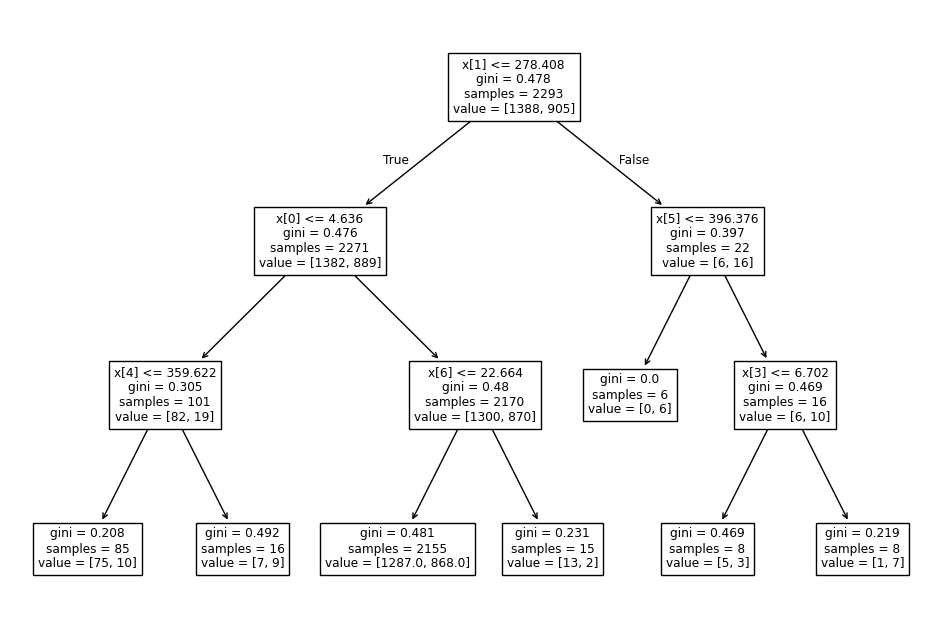

In [142]:
# Για να δείξω το γράφημα λίγο μεγαλύτερο
plt.figure(figsize=(12,8))

tree.plot_tree(best_model)

### Να περιγράψετε τους κανόνες που εξήγαγε το δέντρο.

Ξεκινάμε από τη ρίζα:

[Text(0.5, 0.875, 'x[4] <= 259.026\ngini = 0.478\nsamples = 2293\nvalue = [1388, 905]'
- Εάν το χαρακτηριστικό με index 4 (δηλαδή το *Sulfate (θειϊκή ένωση)* είναι μικρότερο ή ίσο του 259.026, πήγαινε αριστερά. Διαφορετικά πήγαινε δεξιά.
- Ο συντελεστής Gini μας δείχνει την ομοιογένεια του κόμβου. Όπως αναλύσαμε και νωρίτερα, η τιμή 0.478 πλησιάζει στο 0.50, που για 2 κλάσεις (εν προκειμένω) φανερώνει ανομοιογένεια (impurity) του κόμβου.
- Το μέγεθος του δείγματος στη ρίζα είναι 2293, που είναι ίσο με τον αριθμό των δειγμάτων του training set που προέκυψε όταν εφαρμόσαμε το test train split νωρίτερα.
- Το value = [1388, 905] μας λέει πως 1388 δείγματα κατανεμήθηκαν στην binary επιλογή 0 (False) και 905 στο True. Αυτό επιβεβαιώνεται βλέποντας τους επόμενους κόμβους.

Με το ίδιο σκεπτικό, οι κανόνες για τον αριστερά κλάδο είναι:

- Εάν το χαρακτηριστικό *Solids* (το x[2]) <= 21161.408, πήγαινε αριστερά. Διαφορετικά πήγαινε δεξιά.
- Εάν το χαρακτηριστικό *pH* (το x[0]) <= 7.904, πήγαινε αριστερά. Διαφορετικά πήγαινε δεξιά.
ή
- Εάν το χαρακτηριστικό *pH* (το x[0]) <= 4.633, πήγαινε αριστερά. Διαφορετικά πήγαινε δεξιά.

Στον δεξιά κλάδο έχουμε:
- Εάν το χαρακτηριστικό με index 4 (δηλαδή το *Sulfate (θειϊκή ένωση)* είναι μικρότερο ή ίσο του 409.753, πήγαινε αριστερά. Διαφορετικά πήγαινε δεξιά.
- Εάν το χαρακτηριστικό με index 4 (δηλαδή το *Sulfate (θειϊκή ένωση)* είναι μικρότερο ή ίσο του 293.078, πήγαινε αριστερά. Διαφορετικά πήγαινε δεξιά.
ή
- Εάν το χαρακτηριστικό με index 5 (δηλαδή το *Conductivity* είναι μικρότερο ή ίσο του 408.749, πήγαινε αριστερά. Διαφορετικά πήγαινε δεξιά.


## Ερώτημα 9
 Επιλέξτε το συνδυασμό με τη μεγαλύτερη ακρίβεια στο test, επανεκπαιδεύστε το δέντρο και δημιουργήστε ραβδόγραμμα με τη σημαντικότητα κάθε χαρακτηριστικού (feature importance) σύμφωνα με το δέντρο αυτό. Αν η συσκευή μπορεί να υποστηρίζει μέχρι 5 χημικές αναλύσεις, ποια χαρακτηριστικά θα έπρεπε να εξάγει από το νερό? Αιτιολογήστε.



Με βάση τον πίνακα αποτελεσμάτων του ερωτήματος 8, η μεγαλύτερη ακρίβεια στο test επιτυγχάνεται όταν Max Depth = 5 (64.19%).
Για λόγους καθαρότητα κώδικα, ξανατρέχω το μοντέλο παρακάτω:

In [143]:
X = water_df_clean.drop('Potability',axis=1)
y = water_df_clean['Potability']

# Τα χρειάζομαι για τις στήλες του df με τη σημαντότητα κάθε χαρακτηριστικού
column_names = X.columns

X = X.to_numpy()

seed = 0
test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

# πέρα από το max depth, οι άλλες παράμετροι παραμένουν ίδιες
clf = DecisionTreeClassifier(random_state=0, criterion="gini", max_depth=5)
clf.fit(X_train, y_train)

# μέθοδος του ταξινομητή
model_importances = clf.feature_importances_

y_pred_test = clf.predict(X_test)

# Για το ερώτημα 14
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_test)

# δημιουργώ το df
feature_importance_df = pd.DataFrame({
    'feature': column_names,
    'importance': model_importances
})

feature_importance_df


,feature,importance
0,ph,0.157179
1,Hardness,0.175803
2,Solids,0.085578
3,Chloramines,0.042954
4,Sulfate,0.422874
5,Conductivity,0.057207
6,Organic_carbon,0.000000
7,Trihalomethanes,0.058405
8,Turbidity,0.000000


In [144]:
# Ταξινομώ κατά σημαντότητα
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
feature_importance_df.head()


,feature,importance
4,Sulfate,0.422874
1,Hardness,0.175803
0,ph,0.157179
2,Solids,0.085578
7,Trihalomethanes,0.058405


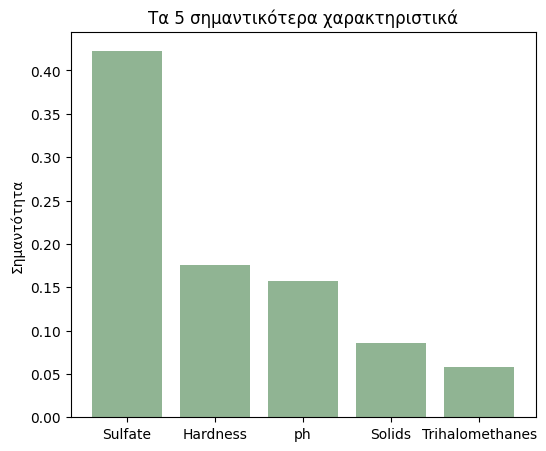

In [145]:
# Τα διαλέγω για την οπτικοποίηση
df_first_5 = feature_importance_df[:5]

plt.figure(figsize=(6, 5))

plt.bar(df_first_5['feature'], df_first_5['importance'], color = colors[0])

plt.ylabel('Σημαντότητα')
plt.title('Τα 5 σημαντικότερα χαρακτηριστικά')
plt.show()

Επομένως αυτά τα 5 χαρακτηριστικά πρέπει να εξάγει η συσκευή, καθώς η σημαντότητα ποσοτικοποιεί πόσο κάθε χαρακτηριστικό συνεισέφερε στη μείωση της ανομοιγένειας στο δένδρο.

## Ερώτημα 11

Εξηγήστε τους λόγους για τους οποίους ένα Τυχαίο Δάσος (Random Forest) ενδεχομένως να πετύχαινε καλύτερη ακρίβεια από το Δέντρο Απόφασης.

Ένα τυχαίο δάσος κατασκευάζει και συνδυάζει πολλά δένδρα με τη διαφορά πως από τα δεδομένα φτιάχνει επιμέρους υποσύνολα πάνω στα οποία εκπαιδεύεται. Αυτό βοηθάει στο να αποφευχθεί το overfitting, καθώς το μοντέλο εν τέλει έχει εκτεθεί σε πολλαπλούς συνδυασμούς των δεδομένων και όχι μόνο σε έναν, και άρα μπορεί να ανταποκριθεί καλύτερα σε άγνωστα δεδομένα.

## Ερώτημα 12

Επαναλάβετε το ερώτημα 6 χρησιμοποιώντας Random Forest https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html . Ορίστε το 0 ως seed. Επιπλέον, στους συνδυασμούς να προστεθεί και το πλήθος των δέντρων (n_estimators) για 50, 100 και 200 δέντρα.

In [146]:
# το seed ήταν ήδη ορισμένο ίσο με 0

n_estimators = [50, 100, 200]
# για να αποθηκεύσω τα TP, TN κλπ.
conf_matrices = {}

for estimator in n_estimators:
  # define the model
  clf = RandomForestClassifier(random_state=0, criterion="gini", n_estimators=estimator)
  # Το Gini είναι η το default κριτήριο διαχωρισμού
  # train it on the train data
  clf.fit(X_train, y_train)
  # and get the predictions, first for the training set
  y_pred_train = clf.predict(X_train)

  accuracy = accuracy_score(y_train, y_pred_train)
  accuracy_percentage_train_gini = round(accuracy*100, 2)

  print(f'The accuracy of the Random Forest model on the training data for n_estimators = {estimator} is: {accuracy_percentage_train_gini}')

  # and for the test set
  y_pred_test = clf.predict(X_test)

  # Για το ερώτημα 14
  conf_matrix_random_forest = confusion_matrix(y_test, y_pred_test)
  conf_matrices[estimator] = conf_matrix_random_forest

  accuracy = accuracy_score(y_test, y_pred_test)
  accuracy_percentage_test_gini = round(accuracy*100, 2)

  print(f'The accuracy of the Random Forest model on the test data for n_estimators = {estimator} is: {accuracy_percentage_test_gini}')


The accuracy of the Random Forest model on the training data for n_estimators = 50 is: 100.0
The accuracy of the Random Forest model on the test data for n_estimators = 50 is: 66.02
The accuracy of the Random Forest model on the training data for n_estimators = 100 is: 100.0
The accuracy of the Random Forest model on the test data for n_estimators = 100 is: 68.26
The accuracy of the Random Forest model on the training data for n_estimators = 200 is: 100.0
The accuracy of the Random Forest model on the test data for n_estimators = 200 is: 67.24


Παρατηρώ πως έχω μεγαλύτερη ακρίβεια (68.26%) για 100 estimators. Επιπλέον, επιβεβαιώνεται πως το Random Forest έχει μεγαλύτερη ακρίβεια από το Decision Tree.

## Ερώτημα 13
Τι είναι πιο σημαντικό για το μοντέλο, να προβλέπει καλά το πόσιμο νερό, αλλά χάνοντας ακρίβεια από το μη-πόσιμο νερό ή να προβλέπει καλύτερα το μη-πόσιμο νερό, χάνοντας ακρίβεια από το πόσιμο? Αιτιολογήστε.

Απάντηση: Είναι προτιμότερο να προβλέπει καλύτερα το μη-πόσιμο νερό, γιατί εάν ένα δείγμα αξιολογηθεί ως πόσιμο και δεν είναι, κινδυνεύει η υγεία του πληθυσμού. Αντίθετα, εάν ένα δείγμα αξιολογηθεί ως μη πόσιμο ενώ είναι, θα υπάρξει κόστος π.χ. για την επανεξέτασή του ή την βελτίωσή του, το οποίο είναι μικρότερο από το κόστος στην ανθρώπινη υγεία, που είναι προτεραιότητα.

## Ερώτημα 14
Τι είναι νομικά ασφαλέστερο για την εταιρία, η χρήση του καλύτερου δέντρου ή του καλύτερου τυχαίου δάσους; Αιτιολογήστε.

Αυτό μπορώ να το μάθω βλέποντας σε ποιό από τα 2 μοντέλα έχω λιγότερα false positive (δηλαδή να αξιολογηθεί το δείγμα ως 1=True=Potable ενώ δεν είναι) με την χρήση του confusion matrix της sklearn. Θυμίζω πως βάση της data card: *Potable: Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable*.

In [147]:
conf_matrices[100]

array([[540,  70],
       [242, 131]])

In [148]:
conf_matrix_decision_tree

array([[572,  38],
       [314,  59]])

Έχω:
- Random Forest False Positives (FP): 70
- Decision Tree False Positives (FP): 38

Άρα επιλέγω το Decision Tree ως το πιο ασφαλές μοντέλο από νομικής σκοπιάς για την εταιρεία.